# Data Task

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
landreg = pd.read_csv('Land_Registry_Price_Paid_Data.csv',error_bad_lines=False, sep='\t', lineterminator='\n',  encoding='utf-8')
landreg["SaleDate"] = pd.to_datetime(landreg["SaleDate"])
landreg = landreg.rename(columns={"Longitude\r": "Longitude"})

In [3]:
landreg
# Some of the lat/lons seem off. 

,LRUniqueID,SalePrice,SaleDate,PCUnit,PropertyType,NewBuild,Freehold,Add1,Add2,Add3,...,Add5,Add6,Add7,LocalAuthorityCode,CensusLSOA,CensusOA,Easting,Northing,Latitude,Longitude
0,{BEF7EBBF-1060-7A76-E053-6B04A8C092F7},194950,2019-10-30,B1 3BG,F,Y,L,"ALBION HOUSE, 75",APARTMENT 408,POPE STREET,...,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,E08000025,E01033619,E00175633,405735,287549,52.485845,-1.916970
1,{80E1AA98-C97F-7BF8-E053-6C04A8C00BF2},125000,2019-01-24,B9 5LR,T,N,F,105,NaN,BOTHA ROAD,...,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,E08000025,E01033649,E00046646,410528,287107,52.481787,-1.846407
2,{8CAC1318-D839-0253-E053-6B04A8C08E51},305000,2019-05-21,B28 8PU,S,N,F,40,NaN,EDENBRIDGE ROAD,...,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,E08000025,E01009023,E00045785,411528,281712,52.433266,-1.831867
3,{8CAC1318-D683-0253-E053-6B04A8C08E51},232000,2019-05-23,B76 1RW,T,N,F,38,NaN,THE RIDDINGS,...,SUTTON COLDFIELD,BIRMINGHAM,WEST MIDLANDS,E08000025,E01009438,E00047830,414591,293565,52.539751,-1.786300
4,{8CAC1318-D8B6-0253-E053-6B04A8C08E51},118500,2019-05-17,B33 0YR,T,N,F,10,NaN,ROYAL STAR CLOSE,...,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,E08000025,E01009303,E00047166,415323,286627,52.477359,-1.775824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119441,{965B6D92-0C42-95E4-E053-6C04A8C07729},120000,2019-09-16,B21 9RQ,T,N,F,41,NaN,WINDERMERE ROAD,...,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,E08000025,E01009266,E00047028,404341,290817,-1.937462,52.515222
119442,{965B6D92-11F5-95E4-E053-6C04A8C07729},230000,2019-08-30,B76 2UL,S,N,F,32,NaN,BARFORD CLOSE,...,SUTTON COLDFIELD,BIRMINGHAM,WEST MIDLANDS,E08000025,E01009452,E00047796,413745,295622,-1.798689,52.558264
119443,{965B6D92-1204-95E4-E053-6C04A8C07729},368500,2019-09-16,B74 4RJ,S,N,F,133,NaN,RUSSELL BANK ROAD,...,SUTTON COLDFIELD,BIRMINGHAM,WEST MIDLANDS,E08000025,E01009417,E00047687,410347,299379,-1.848694,52.592113
119444,{965B6D92-1633-95E4-E053-6C04A8C07729},218250,2019-09-23,B44 8QD,S,N,F,104,NaN,WARREN ROAD,...,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,E08000025,E01009231,E00046775,408186,293255,-1.880743,52.537096


In [4]:
voa_age = pd.read_csv('VOA_Property_Age_Data.csv',error_bad_lines=False, sep='\t', lineterminator='\n')
voa_type = pd.read_csv('VOA_Property_Type_Data.csv',error_bad_lines=False, sep='\t', lineterminator='\n')

In [5]:
""" 
    I'm going to verify the data is corrupted, first I'll check for duplicates.
    
    Drop_duplicates does not work if the dupes are corrupted. So I checked the *unique* sale I.D.
    
    Quote from https://www.gov.uk/guidance/about-the-price-paid-data:

	"A reference number which is generated automatically recording each published sale. 
    The number is unique and will change each time a sale is recorded."
    
    """
landreg['duplication'] = landreg.duplicated(['LRUniqueID'], keep=False)

dupes = landreg.loc[landreg['duplication'] == True]

non_dupes = landreg.loc[landreg['duplication'] == False] 
print(len(dupes))

# There are duplicates. Investigating.


19390


In [6]:
dupes[dupes["LRUniqueID"] == dupes.loc[1]["LRUniqueID"]]

,LRUniqueID,SalePrice,SaleDate,PCUnit,PropertyType,NewBuild,Freehold,Add1,Add2,Add3,...,Add6,Add7,LocalAuthorityCode,CensusLSOA,CensusOA,Easting,Northing,Latitude,Longitude,duplication
1,{80E1AA98-C97F-7BF8-E053-6C04A8C00BF2},125000,2019-01-24,B9 5LR,T,N,F,105,NaN,BOTHA ROAD,...,BIRMINGHAM,WEST MIDLANDS,E08000025,E01033649,E00046646,410528,287107,52.481787,-1.846407,True
59347,{80E1AA98-C97F-7BF8-E053-6C04A8C00BF2},125000,2019-01-24,B9 5LR,T,N,F,105,NaN,BOTHA ROAD,...,BIRMINGHAM,WEST MIDLANDS,E08000025,E01033649,E00046646,410528,287107,-1.846407,52.481787,True



  I've not been to Birmmingham often but I'm pretty sure it isn't off the coast of Somalia. 
 So there are duplicates and some of the data is corrupted. Quickly scanning the non_dupes df tells me that the inversion
 lat/lon corruption effects non-duplicates.
 
 At first I thought that I could fix the lat/lon by undoing the inversion -- then we can run a simple drop_na.
 However the data might be corrupted in other ways and the lat/lon error might indicate other errors.


In [7]:
# What part of the data is corrupted other than lat/lon? It might help to look at the duplicates. Maybe the dupes will give a hint to whats wrong?

corrupt_columns = []

for i, test_dupe in dupes.iterrows(): # Tried making this nicer with an apply but it proved difficut.
    
    matched_dupes = dupes[dupes["LRUniqueID"] == test_dupe["LRUniqueID"]]
    
    for j, row in matched_dupes.iterrows():
        if test_dupe['LRUniqueID'] == row['LRUniqueID']:
            diff = test_dupe.compare(row)
            corrupt_columns.append(diff.index.values.tolist())
            
import itertools
corrupt_columns.sort()
list(corrupt_columns for corrupt_columns,_ in itertools.groupby(corrupt_columns))    


[[],
 ['Add1', 'Add2', 'Add3', 'Latitude', 'Longitude'],
 ['Add1', 'Latitude', 'Longitude'],
 ['CensusLSOA', 'CensusOA', 'Easting', 'Latitude', 'Longitude'],
 ['CensusLSOA', 'CensusOA', 'Easting', 'Northing', 'Latitude', 'Longitude'],
 ['CensusOA', 'Easting', 'Northing', 'Latitude', 'Longitude'],
 ['Easting', 'Latitude', 'Longitude'],
 ['Easting', 'Northing', 'Latitude', 'Longitude'],
 ['Latitude', 'Longitude'],
 ['Northing', 'Latitude', 'Longitude'],
 ['PCUnit',
  'Add1',
  'Add2',
  'Add4',
  'CensusLSOA',
  'CensusOA',
  'Easting',
  'Northing',
  'Latitude',
  'Longitude'],
 ['PropertyType', 'Latitude', 'Longitude'],
 ['SalePrice', 'Latitude', 'Longitude']]

In [8]:
# My hypothesis after running the above is that erroneous lat/lons on duplicates indicate a bad sample.

# Lets see if its true for price.

for i, test_dupe in dupes.iterrows():
    
    matched_dupes = dupes[dupes["LRUniqueID"] == test_dupe["LRUniqueID"]]
    
    for j, row in matched_dupes.iterrows():
        if test_dupe['LRUniqueID'] == row['LRUniqueID']:
            diff = test_dupe.compare(row)
            test = ['SalePrice', 'Latitude', 'Longitude'] 
            if diff.index.values.tolist() == test:
                print(test_dupe)
                print(row)
        if j > 5:
            break
"""
After running this I checked https://themovemarket.com/ for the right answer on a couple samples.
One could scrape the website to confirm the data is valid I suppose but I think the solution is in cleaning the dataset.
After checking differences in duplicates on price it *seems* that if a sample is a duplicate and has erroneous lat/lon then it is likely corrupted.
Testing this with other features listed in corrupt_columns further makes me confident this is the case.
I'm going to go along with this assumption. 

"""

LRUniqueID            {8F1B26BE-60CB-53DB-E053-6C04A8C03649}
SalePrice                                             160000
SaleDate                                 2019-12-07 00:00:00
PCUnit                                               B31 1HB
PropertyType                                               S
NewBuild                                                   N
Freehold                                                   F
Add1                                                      14
Add2                                                     NaN
Add3                                               DAWN ROAD
Add4                                                     NaN
Add5                                              BIRMINGHAM
Add6                                              BIRMINGHAM
Add7                                           WEST MIDLANDS
LocalAuthorityCode                                 E08000025
CensusLSOA                                         E01009495
CensusOA                

LRUniqueID            {919FEC05-F03C-9A90-E053-6C04A8C0A300}
SalePrice                                             238000
SaleDate                                 2019-12-07 00:00:00
PCUnit                                               B38 8YE
PropertyType                                               T
NewBuild                                                   N
Freehold                                                   F
Add1                                                       6
Add2                                                     NaN
Add3                                           GULLANE CLOSE
Add4                                                     NaN
Add5                                              BIRMINGHAM
Add6                                              BIRMINGHAM
Add7                                           WEST MIDLANDS
LocalAuthorityCode                                 E08000025
CensusLSOA                                         E01009118
CensusOA                

"\nAfter running this I checked https://themovemarket.com/ for the right answer on a couple samples.\nOne could scrape the website to confirm the data is valid I suppose but I think the solution is in cleaning the dataset.\nAfter checking differences in duplicates on price it *seems* that if a sample is a duplicate and has erroneous lat/lon then it is likely corrupted.\nTesting this with other features listed in corrupt_columns further makes me confident this is the case.\nI'm going to go along with this assumption. \n\n"

In [9]:
# My plan now is to remove duplicates with bad lat/lons in the dupes df and then correct/investigate the bad lat/lons in the non_dupes df.
# After that I'll merge the two dfs. 

fixed_samples = dupes.loc[dupes['Latitude'] > 0] # Bit hacky but fix works assuming the problem is only the lat/lon inversion error. 


In [10]:
# Fixing lat/lon inversion on non-dupe samples
indx = (non_dupes['Latitude'] < 0)
non_dupes.loc[indx, ['Latitude', 'Longitude']] = non_dupes.loc[indx, ['Longitude', 'Latitude']].values

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [11]:
non_dupes

,LRUniqueID,SalePrice,SaleDate,PCUnit,PropertyType,NewBuild,Freehold,Add1,Add2,Add3,...,Add6,Add7,LocalAuthorityCode,CensusLSOA,CensusOA,Easting,Northing,Latitude,Longitude,duplication
0,{BEF7EBBF-1060-7A76-E053-6B04A8C092F7},194950,2019-10-30,B1 3BG,F,Y,L,"ALBION HOUSE, 75",APARTMENT 408,POPE STREET,...,BIRMINGHAM,WEST MIDLANDS,E08000025,E01033619,E00175633,405735,287549,52.485845,-1.916970,False
15,{8F1B26BE-54AA-53DB-E053-6C04A8C03649},340000,2019-06-27,B90 3HF,D,N,L,14,NaN,WAYFIELD ROAD,...,SOLIHULL,WEST MIDLANDS,E08000029,E01010201,E00051553,412240,279149,52.410209,-1.821487,False
22,{8F1B26BE-5F5E-53DB-E053-6C04A8C03649},435005,2019-06-28,B90 3SS,D,N,F,22,NaN,FINMERE WAY,...,SOLIHULL,WEST MIDLANDS,E08000029,E01010199,E00051557,412854,279054,52.409341,-1.812465,False
27,{8F1B26BE-5F80-53DB-E053-6C04A8C03649},127000,2019-07-22,B37 5BU,T,N,F,139,NaN,CRABTREE DRIVE,...,SOLIHULL,WEST MIDLANDS,E08000029,E01010142,E00051287,416829,286989,52.480569,-1.753633,False
34,{8CAC1318-D6AF-0253-E053-6B04A8C08E51},160000,2019-05-28,B37 6AJ,T,N,F,64,NaN,LABURNUM AVENUE,...,SOLIHULL,WEST MIDLANDS,E08000029,E01010146,E00051300,416728,289006,52.498705,-1.755020,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119389,{965B6D91-9E2F-95E4-E053-6C04A8C07729},110000,2019-10-18,B17 9RD,F,N,L,TIMBERMILL COURT,FLAT 2,SERPENTINE ROAD,...,BIRMINGHAM,WEST MIDLANDS,E08000025,E01009067,E00045983,403014,284544,52.458852,-1.957065,False
119398,{965B6D91-9C24-95E4-E053-6C04A8C07729},100500,2019-08-16,B27 6TE,F,N,L,14,NaN,LIME TREE ROAD,...,BIRMINGHAM,WEST MIDLANDS,E08000025,E01008890,E00045158,412134,284092,52.454649,-1.822868,False
119403,{965B6D91-9D61-95E4-E053-6C04A8C07729},174995,2019-05-17,B38 9DW,S,Y,F,28,NaN,GREEN LANE,...,BIRMINGHAM,WEST MIDLANDS,E08000025,E01009113,E00046211,404283,277712,52.397424,-1.938472,False
119425,{965B6D92-18AB-95E4-E053-6C04A8C07729},200000,2019-04-10,B31 1ND,T,N,F,69,NaN,MEADOW BROOK ROAD,...,BIRMINGHAM,WEST MIDLANDS,E08000025,E01009496,E00048074,401906,280444,52.421983,-1.973399,False


In [12]:
landreg_dupfix = pd.concat([fixed_samples, non_dupes])
print(landreg_dupfix[landreg_dupfix.duplicated(keep=False)])
# No duplicates.

Empty DataFrame
Columns: [LRUniqueID, SalePrice, SaleDate, PCUnit, PropertyType, NewBuild, Freehold, Add1, Add2, Add3, Add4, Add5, Add6, Add7, LocalAuthorityCode, CensusLSOA, CensusOA, Easting, Northing, Latitude, Longitude, duplication]
Index: []

[0 rows x 22 columns]


In [13]:
# Sanity checks 
pd.options.display.float_format = '{:.2f}'.format
print(landreg_dupfix['Add6'].unique()) # South Gloucestershire seems to be a bit of an outlier in terms of proximity to Birmingham.
print(landreg_dupfix['Add7'].unique()) 
print(landreg_dupfix['PropertyType'].unique())
print(landreg_dupfix['NewBuild'].unique())
landreg_dupfix.describe()

['BIRMINGHAM' 'LICHFIELD' 'BROMSGROVE' 'WARWICK' 'SOLIHULL'
 'NORTH WARWICKSHIRE' 'COVENTRY' 'SANDWELL' 'DUDLEY' 'WALSALL'
 'SOUTH GLOUCESTERSHIRE' 'WOLVERHAMPTON']
['WEST MIDLANDS' 'STAFFORDSHIRE' 'WORCESTERSHIRE' 'WARWICKSHIRE'
 'SOUTH GLOUCESTERSHIRE']
['T' 'S' 'D' 'F']
['N' 'Y']


,SalePrice,Easting,Northing,Latitude,Longitude
count,109751.00,109751.00,109751.00,109751.00,109751.00
mean,200322.90,408439.22,286364.43,52.48,-1.88
std,139540.71,4511.06,5899.65,0.05,0.07
min,1.00,397872.00,272323.00,52.35,-2.03
25%,122000.00,405194.00,281752.00,52.43,-1.93
50%,162500.00,408454.00,285777.00,52.47,-1.88
75%,235000.00,411953.00,291151.00,52.52,-1.83
max,4725000.00,426952.00,300912.00,52.61,-1.60


In [14]:
landreg_dupfix.isnull().any()

LRUniqueID            False
SalePrice             False
SaleDate              False
PCUnit                False
PropertyType          False
NewBuild              False
Freehold              False
Add1                   True
Add2                   True
Add3                  False
Add4                   True
Add5                  False
Add6                  False
Add7                  False
LocalAuthorityCode    False
CensusLSOA            False
CensusOA              False
Easting               False
Northing              False
Latitude              False
Longitude             False
duplication           False
dtype: bool

(-0.5, 1.5, -236248.95, 4961249.95)

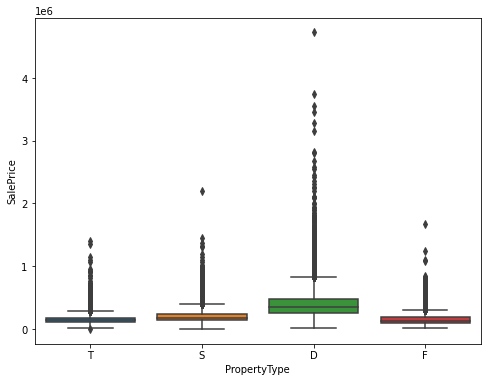

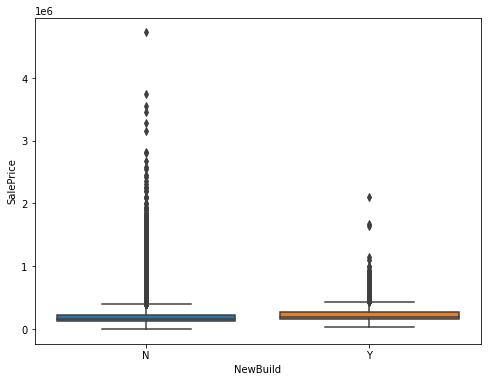

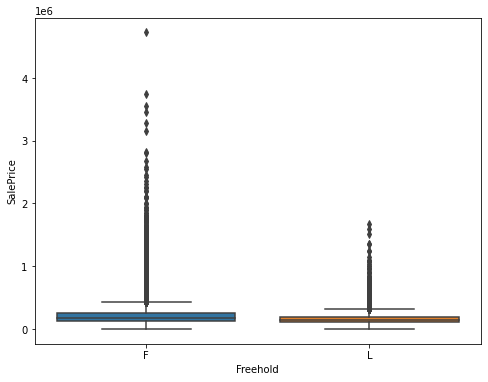

In [15]:
# Plotting and thinking about the data.

# Lets do a price heatmap?
# Is the new railway effecting prices?
# check if nan is in columns

f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='PropertyType', y="SalePrice", data=pd.concat([landreg_dupfix['SalePrice'], landreg_dupfix['PropertyType']], axis=1))
fig.axis()

f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='NewBuild', y="SalePrice", data=pd.concat([landreg_dupfix['SalePrice'], landreg_dupfix['NewBuild']], axis=1))
fig.axis()

f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Freehold', y="SalePrice", data=pd.concat([landreg_dupfix['SalePrice'], landreg_dupfix['Freehold']], axis=1))
fig.axis()

I had a few ideas at this point but decided not to compare house price time-series of properties within walking distance to HS2 to those that aren't. The expectation is that the station would make properties  near it increase in price more than other homes in Bham. There isn't enough data, I think, of properties within walking distance to the station to do this accurately. 

Some ideas I think might be worth investigating:

A. See how being close HS2 line is effecting property prices.(Ran into difficulty with a tricky error loading the .shp file, decided to move to another line of investigation to move things along faster).

B. Collect data near home locations to enrich the features and then try to create a model for price prediction.

C. Use census data and property data to predict house price.

Going with C.

In [16]:
#property_dataset = landreg_dupfix[['CensusOA','SalePrice','SaleDate', 'PropertyType', 'NewBuild', 'Freehold']].copy()
property_dataset = landreg_dupfix.copy()
property_dataset = property_dataset.set_index('SaleDate')
property_dataset.index = property_dataset.index.to_period('D')

In [17]:
property_dataset

,LRUniqueID,SalePrice,PCUnit,PropertyType,NewBuild,Freehold,Add1,Add2,Add3,Add4,...,Add6,Add7,LocalAuthorityCode,CensusLSOA,CensusOA,Easting,Northing,Latitude,Longitude,duplication
SaleDate,,,,,,,,,,,,,,,,,,,,,
2019-01-24,{80E1AA98-C97F-7BF8-E053-6C04A8C00BF2},125000,B9 5LR,T,N,F,105,NaN,BOTHA ROAD,BORDESLEY GREEN,...,BIRMINGHAM,WEST MIDLANDS,E08000025,E01033649,E00046646,410528,287107,52.48,-1.85,True
2019-05-21,{8CAC1318-D839-0253-E053-6B04A8C08E51},305000,B28 8PU,S,N,F,40,NaN,EDENBRIDGE ROAD,NaN,...,BIRMINGHAM,WEST MIDLANDS,E08000025,E01009023,E00045785,411528,281712,52.43,-1.83,True
2019-05-23,{8CAC1318-D683-0253-E053-6B04A8C08E51},232000,B76 1RW,T,N,F,38,NaN,THE RIDDINGS,NaN,...,BIRMINGHAM,WEST MIDLANDS,E08000025,E01009438,E00047830,414591,293565,52.54,-1.79,True
2019-05-17,{8CAC1318-D8B6-0253-E053-6B04A8C08E51},118500,B33 0YR,T,N,F,10,NaN,ROYAL STAR CLOSE,NaN,...,BIRMINGHAM,WEST MIDLANDS,E08000025,E01009303,E00047166,415323,286627,52.48,-1.78,True
2019-05-24,{8CAC1318-D8E6-0253-E053-6B04A8C08E51},324300,B76 2RG,D,N,F,3,NaN,WELTON CLOSE,NaN,...,BIRMINGHAM,WEST MIDLANDS,E08000025,E01009434,E00047821,414253,294669,52.55,-1.79,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-18,{965B6D91-9E2F-95E4-E053-6C04A8C07729},110000,B17 9RD,F,N,L,TIMBERMILL COURT,FLAT 2,SERPENTINE ROAD,HARBORNE,...,BIRMINGHAM,WEST MIDLANDS,E08000025,E01009067,E00045983,403014,284544,52.46,-1.96,False
2019-08-16,{965B6D91-9C24-95E4-E053-6C04A8C07729},100500,B27 6TE,F,N,L,14,NaN,LIME TREE ROAD,ACOCKS GREEN,...,BIRMINGHAM,WEST MIDLANDS,E08000025,E01008890,E00045158,412134,284092,52.45,-1.82,False
2019-05-17,{965B6D91-9D61-95E4-E053-6C04A8C07729},174995,B38 9DW,S,Y,F,28,NaN,GREEN LANE,NaN,...,BIRMINGHAM,WEST MIDLANDS,E08000025,E01009113,E00046211,404283,277712,52.40,-1.94,False


In [18]:
osa_grps = property_dataset.groupby('CensusOA')
osa_dataset = osa_grps.describe()
osa_dataset = osa_dataset['SalePrice'][['mean']]
osa_dataset['oa'] = osa_dataset.index

In [19]:
def add_score_col(df, censusProb, name):
    df[name] = None
    for i, score in enumerate(censusProb):
        indx = (df['oa'] == censusProb.index[i])
        df.loc[indx, [name]] = score
    df[name] = df[name].astype(float)
    return df

health_data = pd.read_csv('bad_health.csv')['QS302EW0001 (base)']
osa_dataset = add_score_col(osa_dataset, health_data, 'badHealthScore')

second_add_total = pd.read_csv('second_add_uk.csv')['QS106EW0001 (base)'] + pd.read_csv('second_add_out.csv')['QS106EW0001 (base)']
osa_dataset = add_score_col(osa_dataset, second_add_total, 'secondAddScore')

ownership_dat =  pd.read_csv('ownership.csv')['Region Name']
osa_dataset = add_score_col(osa_dataset, ownership_dat, 'ownershipScore')

high_education = pd.read_csv('high_education.csv')['Region Name']
osa_dataset = add_score_col(osa_dataset, high_education, 'highEducationScore')

high_depri = pd.read_csv('high_depri.csv')['QS119EW0001 (base)']
osa_dataset = add_score_col(osa_dataset, high_depri, 'highDepriScore')

low_depri = pd.read_csv('low_depri.csv')['QS119EW0001 (base)']
osa_dataset = add_score_col(osa_dataset, low_depri, 'lowDepriScore')

social_grade_c = pd.read_csv('sgC2.csv')['QS611EW0001 (base)']
osa_dataset = add_score_col(osa_dataset, social_grade_c, 'socialGradeC')

train_to_work = pd.read_csv('train_to_work.csv')['QS701EW0001 (base)']
osa_dataset = add_score_col(osa_dataset, train_to_work , 'trainToWork')

osa_dataset = osa_dataset.dropna()

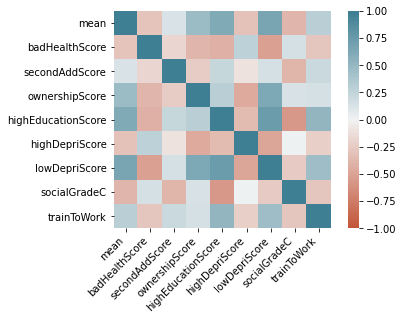

In [20]:
corr = osa_dataset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [21]:
osa_dataset[['trainToWork','badHealthScore','socialGradeC', 'secondAddScore', 'ownershipScore', 'highEducationScore','highDepriScore', 'lowDepriScore']]

,trainToWork,badHealthScore,socialGradeC,secondAddScore,ownershipScore,highEducationScore,highDepriScore,lowDepriScore
CensusOA,,,,,,,,
E00045077,3.85,0.28,23.89,4.14,85.47,25.10,0.00,58.97
E00045078,6.38,0.74,21.32,3.69,83.66,31.37,0.00,62.09
E00045079,6.85,2.03,16.67,2.03,30.97,24.72,0.00,24.78
E00045080,6.11,0.90,16.83,4.06,86.23,28.11,0.72,42.03
E00045081,1.08,2.58,10.00,2.22,50.00,15.68,0.00,17.00
...,...,...,...,...,...,...,...,...
E00175799,0.00,2.65,15.94,0.44,47.57,12.29,0.97,28.16
E00175800,1.46,0.14,4.11,46.39,19.77,48.84,0.00,41.86
E00175801,7.44,1.80,11.11,18.57,58.46,31.47,1.54,41.54


I'm going to try and see if census data improves a model in the prediction of sale price.

I'm going to use  xgboost partially because it can output feature importance, which I am curious to see. It is also just in general a very good algorithm for this kind of dataset. 

In [22]:
# Taking census data and applying it to invididual sales.

kb_osa_dataset = osa_dataset[['trainToWork','ownershipScore', 'secondAddScore','socialGradeC', 'badHealthScore', 'highEducationScore', 'highDepriScore', 'lowDepriScore']]
census_prop_dataset=property_dataset[['Add1', 'Add2', 'Add3', 'Add4','CensusOA','SalePrice', 'PropertyType', 'NewBuild', 'Freehold']].copy()
census_prop_dataset['SaleDate'] = census_prop_dataset.index
census_prop_dataset= census_prop_dataset.set_index(['CensusOA'])
census_prop_dataset= census_prop_dataset.join(kb_osa_dataset)
census_prop_dataset = census_prop_dataset.reset_index()

# Turning categorical data into numeric features
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
onehot = encoder.fit_transform(census_prop_dataset[['PropertyType', 'NewBuild', 'Freehold']])
print(onehot)

column_name = encoder.get_feature_names(['PropertyType', 'NewBuild', 'Freehold'])
one_hot_df =  pd.DataFrame(onehot, columns= column_name)


census_prop_dataset = pd.concat([census_prop_dataset, one_hot_df], axis=1)

[[1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 1. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 1. 0.]]


Training score:  0.32403930183698626
Mean cross-validation score: 0.32
K-fold CV average score: 0.32
MSE: 11569135917.69
RMSE: 107559.92


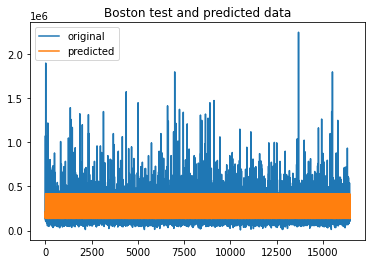

Text(0, 0.5, 'Feature Importance Score')

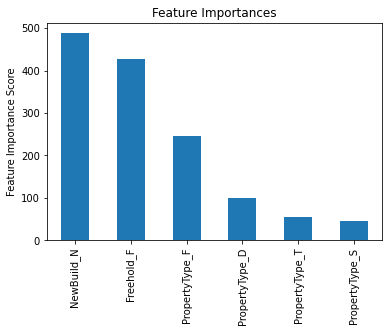

In [23]:
# xgboost WITHOUT census features.
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

# Not enough data per year for good results
#tar_year = '2011'
#property_by_year = census_prop_dataset[census_prop_dataset['SaleDate'] == tar_year]

#X = property_by_year.drop(columns=['SaleDate','PropertyType', 'NewBuild', 'Freehold', 'CensusOA','SalePrice'])

X = census_prop_dataset.drop(columns=['Add1', 'Add2', 'Add3', 'Add4', 'SaleDate','PropertyType', 'NewBuild','ownershipScore','secondAddScore',
                                    'badHealthScore','highDepriScore', 'lowDepriScore','trainToWork','socialGradeC', 'highEducationScore', 'Freehold', 'CensusOA','SalePrice'])
y =  census_prop_dataset['SalePrice']
xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.15)

xgbr = xgb.XGBRegressor() 
xgbr.fit(xtrain, ytrain)

score = xgbr.score(xtrain, ytrain)  
print("Training score: ", score)

scores = cross_val_score(xgbr, xtrain, ytrain,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=20, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

ypred = xgbr.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Boston test and predicted data")
plt.legend()
plt.show()
feat_imp = pd.Series(xgbr.get_booster().get_score(importance_type='weight')).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

Training score:  0.7336169009356861
Mean cross-validation score: 0.69
K-fold CV average score: 0.70
MSE: 5808937283.97
RMSE: 76216.38


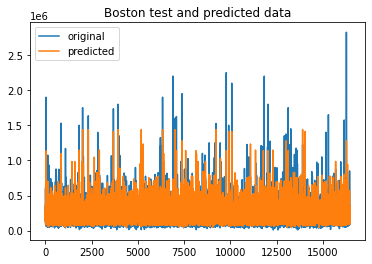

Text(0, 0.5, 'Feature Importance Score')

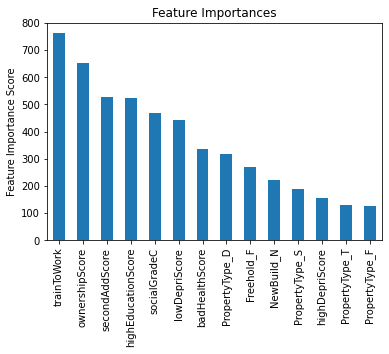

In [24]:
# xgboost WITH census features.

X = census_prop_dataset.drop(columns=['Add1', 'Add2', 'Add3', 'Add4', 'SaleDate','PropertyType', 'NewBuild', 'Freehold', 'CensusOA','SalePrice'])
y =  census_prop_dataset['SalePrice']
xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.15)

xgbr = xgb.XGBRegressor() 
xgbr.fit(xtrain, ytrain)

score = xgbr.score(xtrain, ytrain)  
print("Training score: ", score)

scores = cross_val_score(xgbr, xtrain, ytrain,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=20, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

ypred = xgbr.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))



x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Boston test and predicted data")
plt.legend()
plt.show()

feat_imp = pd.Series(xgbr.get_booster().get_score(importance_type='weight')).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

The model improves using census data. I chose data (educational level, ownership, etc) that I thought was representive of the wealth of an area.

So the models are trying to answer the question 'Can you predict house price given property type, build, and local area characteristics?'

I'm guessing some of inaccuracy is down to the trends in the housing market and I suspect keeping the market trends in the training data will muddy things up. 

I could one-hot encode the year but that makes this model quite uninteresting.

Problems:

1.Outliers causing large error. I'm not a fan of removing outliers just to improve scores. I think most of the outliers in this data point to lack of data about the house (such as no. bedrooms), some are questionable - like selling a house for 1 pound which I'm guessing is either an error or a legal loophole.

2.Values treated as stable despite changing (2011 census data). Things can change a lot over the years.

3.Not enough data on each house. Could scrape the web for more of it potentially.

4.Including date makes the model less interesting.

--------------------------------------

I'm going to attempt to make the model be predictive of the current price by removing the trend and adjusting prices to the latest price trend.

<AxesSubplot:xlabel='SaleDate'>

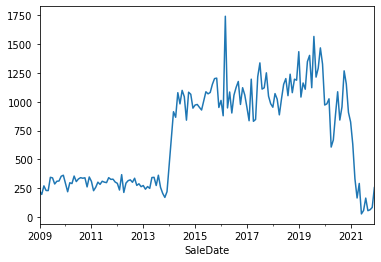

In [25]:
property_dataset.groupby(pd.PeriodIndex(property_dataset.index, freq="M"))['SalePrice'].count().plot()
# The resolution of the data differs at different points in time.

<AxesSubplot:xlabel='SaleDate'>

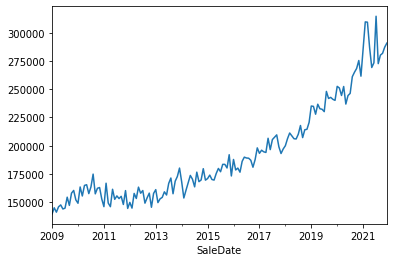

In [26]:
property_dataset.groupby(pd.PeriodIndex(property_dataset.index, freq="M"))['SalePrice'].mean().plot()

In [27]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
property_day = property_dataset.groupby(pd.PeriodIndex(property_dataset.index, freq="D"))
ts = property_day['SalePrice'].mean().reset_index().set_index('SaleDate')
result = adfuller(ts.SalePrice)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.760379
p-value: 0.400302


Well that's expected for property sales data over a decade.
I'm going to find and remove the trend from the data with ARIMA.

                               SARIMAX Results                                
Dep. Variable:              SalePrice   No. Observations:                 3314
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -40454.057
Date:                Tue, 02 Nov 2021   AIC                          80912.115
Time:                        23:15:28   BIC                          80924.326
Sample:                    01-04-2009   HQIC                         80916.485
                         - 12-05-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9820      0.003   -290.627      0.000      -0.989      -0.975
sigma2      2.852e+09   2.12e-13   1.35e+22      0.000    2.85e+09    2.85e+09
Ljung-Box (L1) (Q):                   0.50   Jarque-

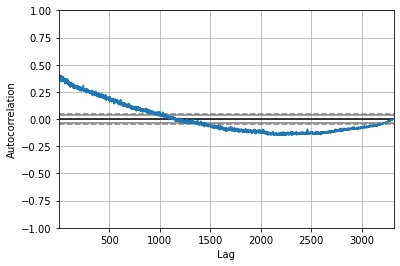

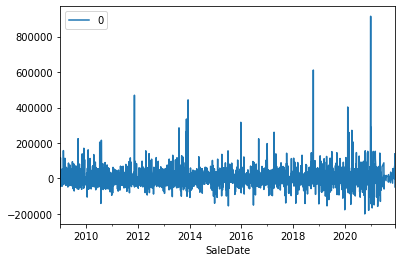

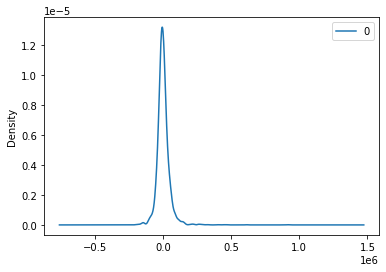

               0
count    3314.00
mean     2682.37
std     48094.58
min   -200589.04
25%    -19673.28
50%     -1204.04
75%     19769.59
max    915209.46
ADF Statistic: -24.1224879741
p-value: 0.000000000000000000000000000000


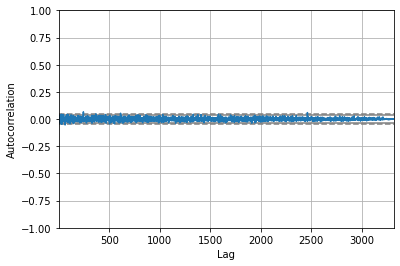

In [28]:
autocorrelation_plot(ts)
model = ARIMA(ts, order=(0,1,1)) # Tweaked parameters based on p-values
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())
autocorrelation_plot(residuals)
result = adfuller(residuals.values)
print('ADF Statistic: %.10f' % result[0])
print('p-value: %.30f' % result[1])

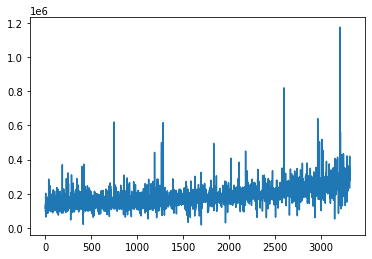

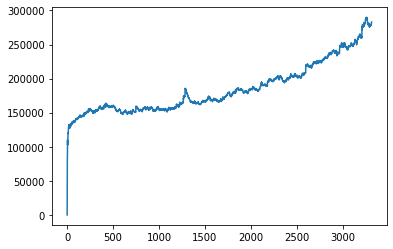

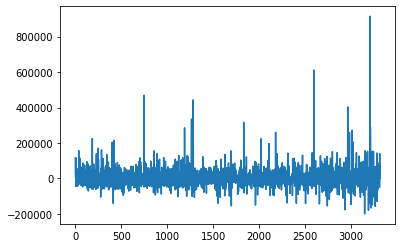

In [29]:
trend = ts.values-residuals.values
plt.plot(ts.values)
plt.show()
plt.plot(trend)
plt.show()
plt.plot(ts.values-trend)
plt.show()

I think the begining is exploding due to a lack of data for the time period perhaps? Not sure.

I want to make sure that seasonality is also accounted for.

In [30]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
import pyramid.arima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(ts, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

C:\Anaconda\lib\site-packages\pyramid\__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https://github.com/tgsmith61591/pyramid/issues/34
        
    The package will subsequently be installable via the name 'pmdarima'; the
    only functional change to the user will be the import name. All imports
    from 'pyramid' will change to 'pmdarima'.
    
  """, UserWarning)


Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=81328.684, BIC=81359.195, Fit time=2.660 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=82894.404, BIC=82906.608, Fit time=0.190 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=82107.655, BIC=82132.064, Fit time=1.506 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=81328.518, BIC=81352.927, Fit time=2.123 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(1, 1, 1, 12); AIC=81329.304, BIC=81359.815, Fit time=3.280 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 0, 12); AIC=82896.398, BIC=82914.705, Fit time=0.409 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 2, 12); AIC=81329.515, BIC=81360.026, Fit time=6.610 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(1, 1, 2, 12); AIC=81331.124, BIC=81367.737, Fit time=14.441 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 1, 12); AIC=81327.969, BIC=81346.276, Fit time=1.385 seconds
Fit ARIMA

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:                          y   No. Observations:                 3314
Model:             SARIMAX(0, 1, [1], 12)   Log Likelihood              -40660.985
Date:                    Tue, 02 Nov 2021   AIC                          81327.969
Time:                            23:16:21   BIC                          81346.276
Sample:                                 0   HQIC                         81334.522
                                   - 3314                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    605.4139     98.212      6.164      0.000     412.922     797.906
ma.S.L12      -0.9449      0.012    -81.588      0.000      -0.968      -0.922
sigma2      4.674e+09      0.000   4.25e+13      0.000    4.67e+09    4.67e+09
===================================================================================
Ljung-Box (L1) (Q):                   2.21   Jarque-Bera (JB):            396367.79
Prob(Q):                              0.14   Prob(JB):                         0.00
Heteroskedasticity (H):               1.94   Skew:                             3.93
Prob(H) (two-sided):                  0.00   Kurtosis:                        56.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.85e+29. Standard errors may be unstable.
"""

In [31]:
residuals = pd.DataFrame(smodel.resid())
result = adfuller(residuals)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -8.212829
p-value: 0.000000


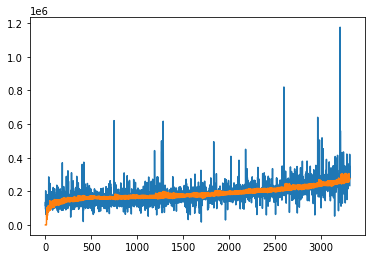

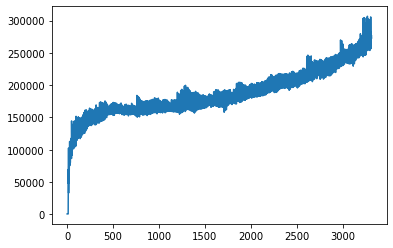

In [32]:
trend = ts.values-residuals.values
ts['trend'] = trend
plt.plot(ts.values)
plt.show()
plt.plot(trend)
plt.show()

In [33]:
ts

,SalePrice,trend
SaleDate,,
2009-01-04,116250.56,605.41
2009-01-05,137101.51,605.41
2009-01-06,93625.00,605.41
2009-01-07,203103.57,605.41
2009-01-08,64000.00,605.41
...,...,...
2021-12-01,350903.85,274693.13
2021-12-02,277521.07,275055.43
2021-12-03,288027.63,273217.61


Not sure what's causing the behaviour near the start of the series.

<AxesSubplot:>

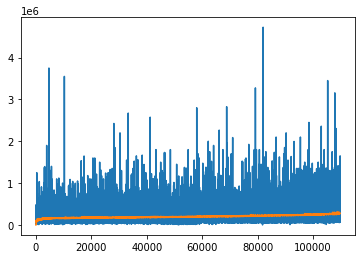

In [34]:
# Converting SalePrice to corrected SalePrice.

current_trend = ts['trend'].values[-360:].mean() # Newest data lacks resolution so an average seems best. 
property_wtrend = census_prop_dataset.copy().set_index('SaleDate')
property_wtrend = property_wtrend.join(ts['trend'])
property_wtrend = property_wtrend.reset_index()
property_wtrend['noTrendSalePrice'] = (property_wtrend['SalePrice'] - property_wtrend['trend']) + current_trend
property_wtrend['SalePrice'].plot()
property_wtrend['trend'].plot()

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:squarederror', predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, scale_pos_weight=None,
             subsample=None, tree_method=None, validate_parameters=None,
             verbosity=None)
Training score:  0.7519488330664796
Mean cross-validation score: 0.71
K-fold CV average score: 0.71
MSE: 6107479070.99
RMSE: 78150.36


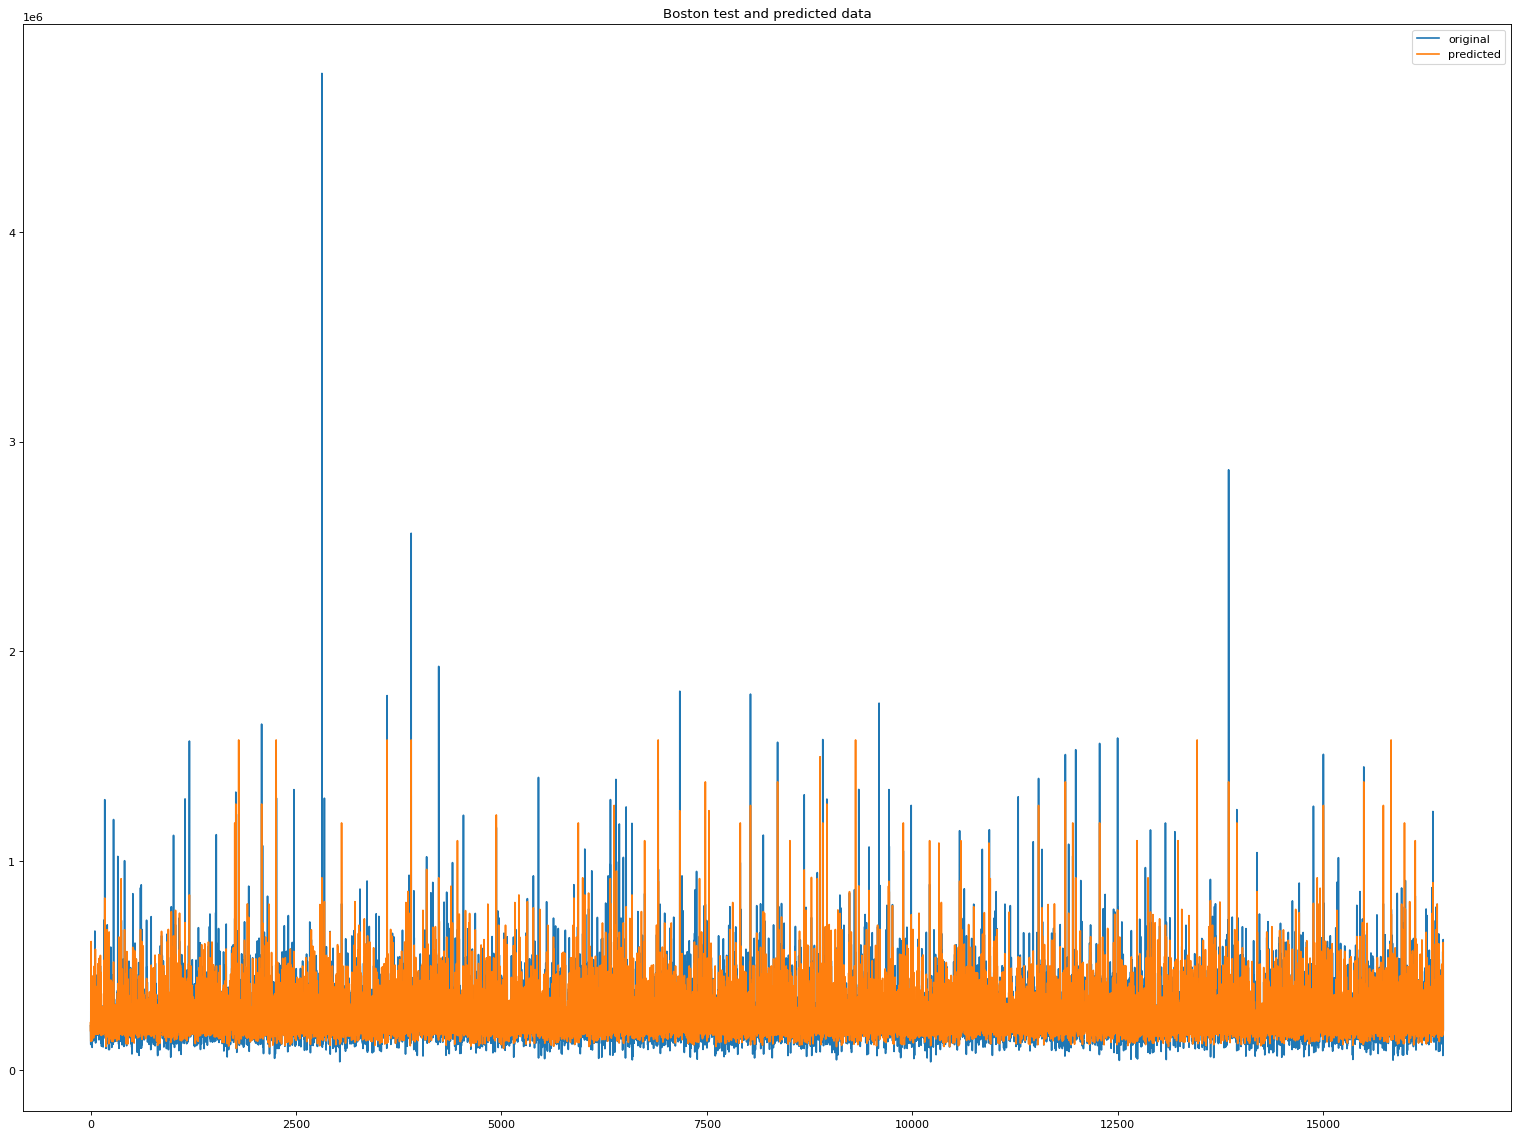

In [35]:
# xgboost WITH census features WITH trend-corrected SalePrice data.

# Turning categorical data into numeric features

X = property_wtrend.drop(columns=['Add1', 'Add2', 'Add3', 'Add4','SaleDate','PropertyType', 'NewBuild', 'Freehold', 'CensusOA','SalePrice', 'trend', 'noTrendSalePrice'])
y =  property_wtrend['noTrendSalePrice']
xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.15)

xgbr = xgb.XGBRegressor() 
print(xgbr)
xgbr.fit(xtrain, ytrain)

score = xgbr.score(xtrain, ytrain)  
print("Training score: ", score)

scores = cross_val_score(xgbr, xtrain, ytrain,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=20, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

ypred = xgbr.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

from matplotlib.pyplot import figure

figure(figsize=(24, 18), dpi=80)

x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Boston test and predicted data")
plt.legend()
plt.show()

In [36]:
sample = property_wtrend.sample()
X_samp = sample.drop(columns=['Add1', 'Add2', 'Add3', 'Add4','SaleDate','PropertyType', 'NewBuild', 'Freehold', 'CensusOA','SalePrice', 'trend', 'noTrendSalePrice'])
print(xgbr.predict(X_samp))
sample
# Compares decently to http://www.acadata.co.uk/ just through some manual testing.

[247262.06]


,SaleDate,CensusOA,Add1,Add2,Add3,Add4,SalePrice,PropertyType,NewBuild,Freehold,...,PropertyType_D,PropertyType_F,PropertyType_S,PropertyType_T,NewBuild_N,NewBuild_Y,Freehold_F,Freehold_L,trend,noTrendSalePrice
1493,2009-06-30,E00175659,"ORION BUILDING, 90",APARTMENT 508,NAVIGATION STREET,NaN,113750,F,N,L,...,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,123109.50,246367.95


[0]	validation_0-rmse:237039.12500	validation_1-rmse:239018.23438
[1]	validation_0-rmse:195358.25000	validation_1-rmse:198082.98438
[2]	validation_0-rmse:162657.57812	validation_1-rmse:166429.20312
[3]	validation_0-rmse:137187.32812	validation_1-rmse:142009.95312
[4]	validation_0-rmse:118152.65625	validation_1-rmse:123834.61719
[5]	validation_0-rmse:103559.91406	validation_1-rmse:110152.64844
[6]	validation_0-rmse:92849.73438	validation_1-rmse:100388.19531
[7]	validation_0-rmse:85176.02344	validation_1-rmse:93481.17969
[8]	validation_0-rmse:79529.39062	validation_1-rmse:88598.02344
[9]	validation_0-rmse:75542.96094	validation_1-rmse:85196.30469
[10]	validation_0-rmse:72639.36719	validation_1-rmse:82889.67188
[11]	validation_0-rmse:70653.44531	validation_1-rmse:81319.39062
[12]	validation_0-rmse:69182.49219	validation_1-rmse:80183.54688
[13]	validation_0-rmse:68203.32812	validation_1-rmse:79461.05469
[14]	validation_0-rmse:67344.49219	validation_1-rmse:78821.40625
[15]	validation_0-rmse

[250]	validation_0-rmse:61570.34766	validation_1-rmse:76827.67188
[251]	validation_0-rmse:61571.63672	validation_1-rmse:76863.84375
[252]	validation_0-rmse:61559.97266	validation_1-rmse:76842.60156
[253]	validation_0-rmse:61560.04688	validation_1-rmse:76823.18750
[254]	validation_0-rmse:61561.05469	validation_1-rmse:76847.40625
[255]	validation_0-rmse:61566.19531	validation_1-rmse:76883.50000
[256]	validation_0-rmse:61561.85156	validation_1-rmse:76889.32812
[257]	validation_0-rmse:61553.98047	validation_1-rmse:76889.74219
[258]	validation_0-rmse:61544.46875	validation_1-rmse:76901.80469
[259]	validation_0-rmse:61542.66016	validation_1-rmse:76884.07812
[260]	validation_0-rmse:61541.33984	validation_1-rmse:76887.99219
[261]	validation_0-rmse:61540.60938	validation_1-rmse:76882.85156
[262]	validation_0-rmse:61539.05469	validation_1-rmse:76876.25000
[263]	validation_0-rmse:61537.44922	validation_1-rmse:76917.50000
[264]	validation_0-rmse:61534.26172	validation_1-rmse:76902.55469
[265]	vali

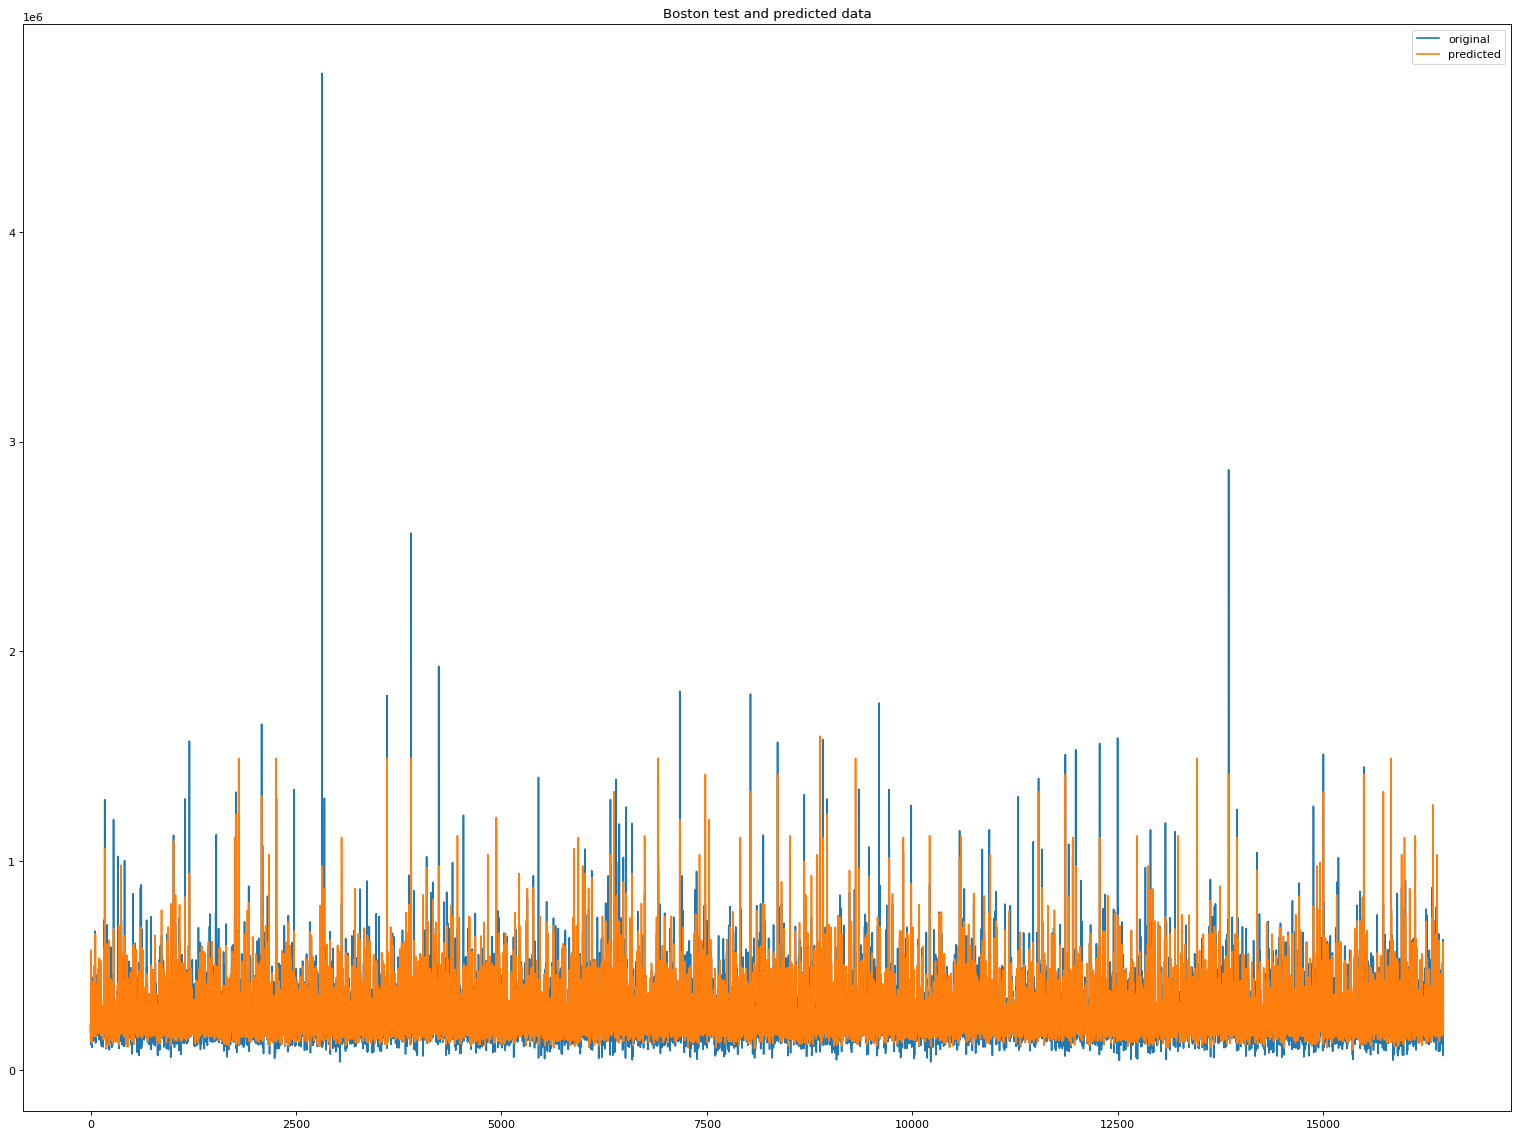

In [37]:
# Tuning and improving model.

X = property_wtrend.drop(columns=['Add1', 'Add2', 'Add3', 'Add4','SaleDate','PropertyType', 'NewBuild', 'Freehold', 'CensusOA','SalePrice', 'trend', 'noTrendSalePrice'])
y =  property_wtrend['noTrendSalePrice']

xtrain, xval, ytrain, yval = train_test_split(X, y, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2
    
xgbr = xgb.XGBRegressor(
    gamma = 0.5,
    max_depth=10,
    n_estimators=1000,
    min_child_weight=0.5, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.2,
    seed=42)


xgbr.fit(
    xtrain, 
    ytrain, 
    eval_metric="rmse", 
    eval_set=[(xtrain, ytrain), (xval, yval)], 
    verbose=True, 
    early_stopping_rounds = 100)
score = xgbr.score(xtrain, ytrain)  
print("Training score: ", score)

ypred = xgbr.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

from matplotlib.pyplot import figure

figure(figsize=(24, 18), dpi=80)

x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Boston test and predicted data")
plt.legend()
plt.show()

Text(0, 0.5, 'Feature Importance Score')

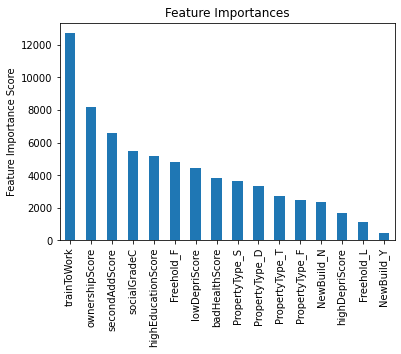

In [38]:
feat_imp = pd.Series(xgbr.get_booster().get_score(importance_type='weight')).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [39]:
sample = property_wtrend.sample()
X_samp = sample.drop(columns=['Add1', 'Add2', 'Add3', 'Add4','SaleDate','PropertyType', 'NewBuild', 'Freehold', 'CensusOA','SalePrice', 'trend', 'noTrendSalePrice'])
print(xgbr.predict(X_samp))
sample
# Compares decently to http://www.acadata.co.uk/ just through some manual testing.

[337419.28]


,SaleDate,CensusOA,Add1,Add2,Add3,Add4,SalePrice,PropertyType,NewBuild,Freehold,...,PropertyType_D,PropertyType_F,PropertyType_S,PropertyType_T,NewBuild_N,NewBuild_Y,Freehold_F,Freehold_L,trend,noTrendSalePrice
43698,2016-03-22,E00046968,35,NaN,HUNSTANTON AVENUE,NaN,325000,S,N,F,...,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,203988.85,376738.61


The model improved (Training score:  0.7905163462319953) and gives estimates sometimes similar to price prediction tools found on Google.

From here I would look into further data collection, perhaps collect point of interests nearest to each property and use that as another feature. I'd also add more census data and decide which census features to keep.

TrainToWork having a high feature importance I think indicates that POI of the surrounding area contributes a lot to price. I think if I were to continue working on this I would add data such as the distance to a train, cafes, museums, parks, etc. Crime statistics would also be useful. It would be interesting to have emissions data, noise data, and general pollutant data as well to use.

The census features describe the social position which is also important and has a high feature score. Tailoring these features to avoid redundancy and adding more features which add further nuance to the social dimension described would be the best next step.

More data about each property would defintely improve the model. Such as house size, room count, condition, etc.